# ONE DAY & 30 DAYS FORECASTING

In [128]:
#pip install yfinance

In [129]:
#See the yahoo finance ticker for your stock symbol

#stock_symbol = '^GSPC'
stock_symbol = '^VIX'

#stock_symbol = 'CL=F'
#stock_symbol = 'NG=F'

#stock_symbol = 'GC=F'
#stock_symbol = 'SI=F'
#stock_symbol = 'HG=F'

#stock_symbol = 'EURUSD=X'
#stock_symbol = 'EURCHF=X'

Object_study = 'VIX'

In [130]:
#pip install numpy==1.19.5

In [131]:
#pip install plotly==5.3.1

In [132]:
#pip install keras

In [133]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from plotly.graph_objs import graph_objs
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.style.use('fivethirtyeight')

In [134]:
import keras

In [135]:
import yfinance as yf

In [136]:
import plotly.graph_objs as go

In [137]:
#Set the start and end date for the analysis
#start = datetime(2016, 12, 27)
#end = datetime(2021, 12, 28)
#origdata = yf.download(tickers=stock_symbol, start=start, end=end)

In [138]:
origdata = yf.download(tickers=stock_symbol, period='5y', interval='1d')
origdata

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-23,12.300000,12.620000,11.590000,11.770000,11.770000,0
2017-01-24,11.820000,11.890000,11.040000,11.070000,11.070000,0
2017-01-25,10.790000,11.050000,10.510000,10.810000,10.810000,0
2017-01-26,10.610000,11.010000,10.600000,10.630000,10.630000,0
2017-01-27,10.570000,10.820000,10.300000,10.580000,10.580000,0
...,...,...,...,...,...,...
2022-01-14,20.110001,22.070000,19.049999,19.190001,19.190001,0
2022-01-18,21.180000,23.200001,21.180000,22.790001,22.790001,0
2022-01-19,23.120001,23.990000,21.850000,23.850000,23.850000,0


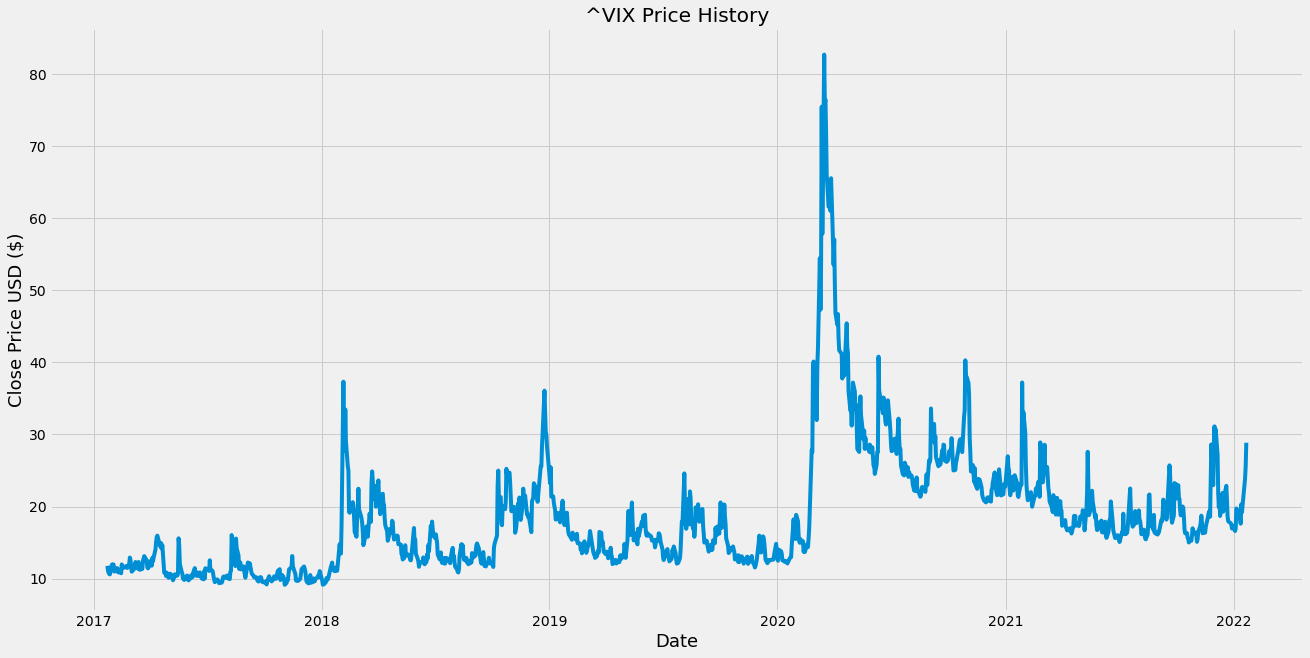

In [139]:
plt.figure(figsize=(20,10))
plt.title("{0} Price History".format(stock_symbol))
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)
plt.plot(origdata['Close'])

In [140]:
origdata = origdata.filter(['Close'])
origdata

,Close
Date,
2017-01-23,11.770000
2017-01-24,11.070000
2017-01-25,10.810000
2017-01-26,10.630000
2017-01-27,10.580000
...,...
2022-01-14,19.190001
2022-01-18,22.790001
2022-01-19,23.850000


In [141]:
#df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [142]:
# Create isocalendar
closingdata = origdata
closingdata["week"] = closingdata.index.isocalendar().week

# Completing Time Series
idx = pd.date_range(closingdata.index[0], closingdata.index[-1]) #create dates for completed time series
completedata =closingdata.reindex(idx, fill_value= float("NaN")) #complete missing dates with NAN
completedata = completedata.fillna(method='ffill') #fill NAN with last observation (e.g., Value for Friday on Weekend)


In [143]:
cols_to_keep = ["Close"]
alldata = completedata.loc[:,cols_to_keep]
alldata

,Close
2017-01-23,11.770000
2017-01-24,11.070000
2017-01-25,10.810000
2017-01-26,10.630000
2017-01-27,10.580000
...,...
2022-01-17,19.190001
2022-01-18,22.790001
2022-01-19,23.850000
2022-01-20,25.590000


In [144]:
dataset = alldata.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1460

In [145]:
dataset.shape

(1825, 1)

# Scaling data

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [147]:
datasetscaled = scaler.fit_transform(dataset)

In [148]:
#datasetscaled

In [149]:
datasetscaled.shape

(1825, 1)

# DATA TRAINING

In [150]:
#Create the training data set and the scaled training data set
data_trainingscaled=datasetscaled[0:training_data_len,:]#data_trainingscaled REPLACED train_data

In [151]:
#data_trainingscaled

In [152]:
data_trainingscaled.shape

(1460, 1)

In [153]:
#split the data into x_train and y_train data sets
x_trainscaled = []
y_trainscaled = []

In [154]:
len(data_trainingscaled)

1460

In [155]:
#set training for 60 days, look back is the timeframe for the LSTM model 
look_back=60

for i in range (look_back, len(data_trainingscaled)):
    x_trainscaled.append(data_trainingscaled[i-look_back:i,0])
    y_trainscaled.append(data_trainingscaled[i,0])
  

In [156]:
  if i<=61:
        print(x_trainscaled)
        print(y_trainscaled)
        print()

In [157]:
#convert x_train and y_train to numpy arrays
x_trainscaled,y_trainscaled = np.array(x_trainscaled), np.array(y_trainscaled)


In [158]:
print(x_trainscaled.shape)
print(y_trainscaled.shape)

(1400, 60)
(1400,)


In [159]:
#reshape the data :
#Since the LSTM model takes input a 3 Dimensional array, 
#the 2 Dimension array was expanded to 3 Dimensions
x_trainscaled=np.reshape(x_trainscaled,(x_trainscaled.shape[0], x_trainscaled.shape[1],1))
x_trainscaled.shape

(1400, 60, 1)

In [160]:
y_trainscaled.shape

(1400,)

# CREATE AND TRAIN LSTM_Sigmoid Sequential function NN 50-50-25-1


In [161]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [162]:
model = Sequential()

In [163]:
#build LSTM model
model.add(LSTM(50,activation='sigmoid',return_sequences=True,input_shape=(x_trainscaled.shape[1],1)))
model.add(LSTM(50,activation='sigmoid',return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [164]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [165]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [166]:
#train the model
model.fit(x_trainscaled,y_trainscaled, batch_size=32,epochs=50)

Epoch 1/50
44/44 [==============================] - 15s 75ms/step - loss: 0.0682
Epoch 2/50
44/44 [==============================] - 3s 73ms/step - loss: 0.0165
Epoch 3/50
44/44 [==============================] - 3s 72ms/step - loss: 0.0167
Epoch 4/50
44/44 [==============================] - 3s 75ms/step - loss: 0.0158
Epoch 5/50
44/44 [==============================] - 3s 76ms/step - loss: 0.0150
Epoch 6/50
44/44 [==============================] - 3s 77ms/step - loss: 0.0160
Epoch 7/50
44/44 [==============================] - 3s 74ms/step - loss: 0.0156
Epoch 8/50
44/44 [==============================] - 3s 73ms/step - loss: 0.0129: 0s -
Epoch 9/50
44/44 [==============================] - 4s 81ms/step - loss: 0.0088
Epoch 10/50
44/44 [==============================] - 3s 76ms/step - loss: 0.0043
Epoch 11/50
44/44 [==============================] - 3s 72ms/step - loss: 0.0021
Epoch 12/50
44/44 [==============================] - 3s 74ms/step - loss: 0.0017
Epoch 13/50
44/44 [===========

# DATA TESTING

In [167]:
data_testing = dataset[training_data_len:]

In [168]:
#data_testing

In [169]:
#create a new array containing scaled values 
data_testingscaled = scaler.transform(data_testing)

In [170]:
#data_testingscaled

In [171]:
x_testscaled = []
y_testscaled = data_testingscaled[60:]

for i in range(60, len(data_testingscaled)):
    x_testscaled.append(data_testingscaled[i-60:i,0])

In [172]:
#the lists coming out from the previous block need to be transformed in a numy array

In [173]:
x_testscaled , y_testscaled = np.array(x_testscaled) ,np.array(y_testscaled)

In [174]:
x_testscaled.shape

(305, 60)

In [175]:
#reshape the data
x_testscaled = np.reshape(x_testscaled,(x_testscaled.shape[0],x_testscaled.shape[1],1))
x_testscaled.shape

(305, 60, 1)

In [176]:
y_test = scaler.inverse_transform(y_testscaled)
y_test.shape

(305, 1)

In [177]:
# get the models predicted price values
predictionsscaled = model.predict(x_testscaled)
predictionsscaled.shape

(305, 1)

In [178]:
predictions = scaler.inverse_transform(predictionsscaled)

In [179]:
predictions.shape

(305, 1)

In [180]:
predictions

array([[21.323095],
       [21.598583],
       [22.14803 ],
       [21.674799],
       [21.006166],
       [20.724962],
       [20.588026],
       [21.431055],
       [21.210869],
       [21.012194],
       [19.917976],
       [19.4516  ],
       [19.231247],
       [19.097683],
       [19.291489],
       [19.451298],
       [19.033049],
       [18.750196],
       [18.496914],
       [18.374027],
       [18.303774],
       [18.36506 ],
       [18.25035 ],
       [18.360922],
       [18.19634 ],
       [17.966208],
       [17.865814],
       [17.814705],
       [18.29283 ],
       [19.170683],
       [18.9663  ],
       [19.499825],
       [19.07417 ],
       [18.913862],
       [18.859837],
       [18.987137],
       [18.997047],
       [18.86206 ],
       [18.968477],
       [19.504478],
       [19.731424],
       [19.838446],
       [19.75559 ],
       [20.31365 ],
       [20.399006],
       [20.074602],
       [19.1189  ],
       [18.719835],
       [18.532299],
       [19.879274],


In [181]:
#get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean (predictions - y_test)**2)
rmse

1.4077366219192256

In [182]:
#start = datetime(2016, 12, 27)
#end = datetime(2021, 12, 28)
#origdata = yf.download(tickers=stock_symbol, start=start, end=end)

# MANIPULATING DATA_TRAINING, DATA_TESTING & PREDICTION FOR PLOTTING

In [183]:
pdata_training = dataset[:training_data_len]
pdata_training=pd.DataFrame(pdata_training)

training_datadates = pd.DataFrame()
training_datadates['Date'] = pd.date_range('01/23/2017', periods = 1460 , freq ='d')

pdata_training.columns=['Actual_Close']
pdata_training = pd.concat([training_datadates,pdata_training],axis=1)

pdata_training

,Date,Actual_Close
0,2017-01-23,11.77
1,2017-01-24,11.07
2,2017-01-25,10.81
3,2017-01-26,10.63
4,2017-01-27,10.58
...,...,...
1455,2021-01-17,24.34
1456,2021-01-18,24.34
1457,2021-01-19,23.24
1458,2021-01-20,21.58


In [184]:
pdata_testing = dataset[training_data_len:]
pdata_testing=pd.DataFrame(pdata_testing)

testing_datadates = pd.DataFrame()
testing_datadates['Date'] = pd.date_range('01/22/2021', periods = 365 , freq ='d')

pdata_testing.columns=['Actual_Close']
pdata_testing = pd.concat([testing_datadates,pdata_testing],axis=1)

pdata_testing

,Date,Actual_Close
0,2021-01-22,21.910000
1,2021-01-23,21.910000
2,2021-01-24,21.910000
3,2021-01-25,23.190001
4,2021-01-26,23.020000
...,...,...
360,2022-01-17,19.190001
361,2022-01-18,22.790001
362,2022-01-19,23.850000
363,2022-01-20,25.590000


In [185]:
ppredictions=pd.DataFrame(predictions)

predictionsdates=pd.DataFrame()
predictionsdates['Date']=pd.date_range('03/23/2021', periods=305 ,freq='d')

ppredictions.columns=['Predicted_Close']
ppredictions=pd.concat([predictionsdates,ppredictions],axis=1)

ppredictions

,Date,Predicted_Close
0,2021-03-23,21.323095
1,2021-03-24,21.598583
2,2021-03-25,22.148029
3,2021-03-26,21.674799
4,2021-03-27,21.006166
...,...,...
300,2022-01-17,20.593037
301,2022-01-18,20.604288
302,2022-01-19,22.391483
303,2022-01-20,23.683594


In [186]:
predvsactual = pdata_testing.merge(ppredictions,right_index=False)
predvsactual

,Date,Actual_Close,Predicted_Close
0,2021-03-23,20.299999,21.323095
1,2021-03-24,21.200001,21.598583
2,2021-03-25,19.809999,22.148029
3,2021-03-26,18.860001,21.674799
4,2021-03-27,18.860001,21.006166
...,...,...,...
300,2022-01-17,19.190001,20.593037
301,2022-01-18,22.790001,20.604288
302,2022-01-19,23.850000,22.391483
303,2022-01-20,25.590000,23.683594


In [187]:
predvsactual.set_index(predvsactual["Date"], inplace=True)
predvsactual=predvsactual.drop(['Date'], axis=1)
predvsactual

,Actual_Close,Predicted_Close
Date,,
2021-03-23,20.299999,21.323095
2021-03-24,21.200001,21.598583
2021-03-25,19.809999,22.148029
2021-03-26,18.860001,21.674799
2021-03-27,18.860001,21.006166
...,...,...
2022-01-17,19.190001,20.593037
2022-01-18,22.790001,20.604288
2022-01-19,23.850000,22.391483


<function matplotlib.pyplot.show(close=None, block=None)>

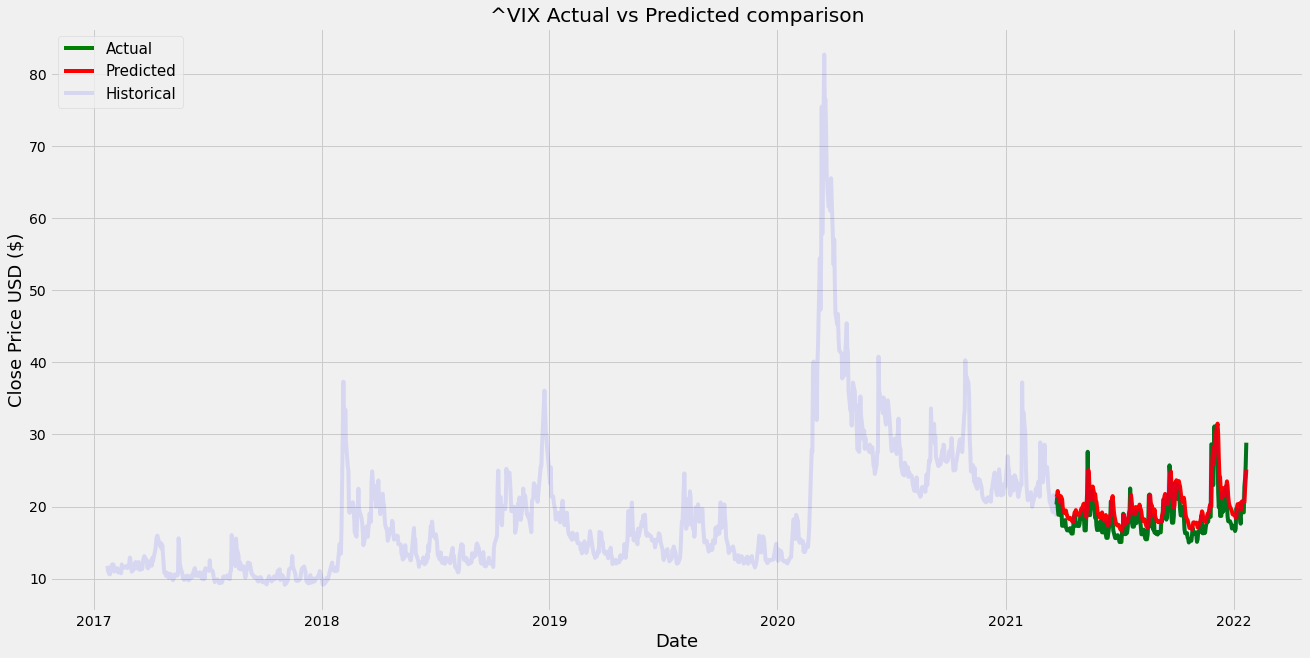

In [188]:
#visualize
plt.figure(figsize=(20,10))

plt.title("{0} Actual vs Predicted comparison".format(stock_symbol))
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(predvsactual['Actual_Close'],color='green', alpha=1,label='Actual')
plt.plot(predvsactual['Predicted_Close'],color='red', alpha=1,label='Predicted')
plt.plot(origdata['Close'],color='blue', alpha=0.1, label='Historical')

plt.legend(loc='upper left', fontsize=15)

plt.show

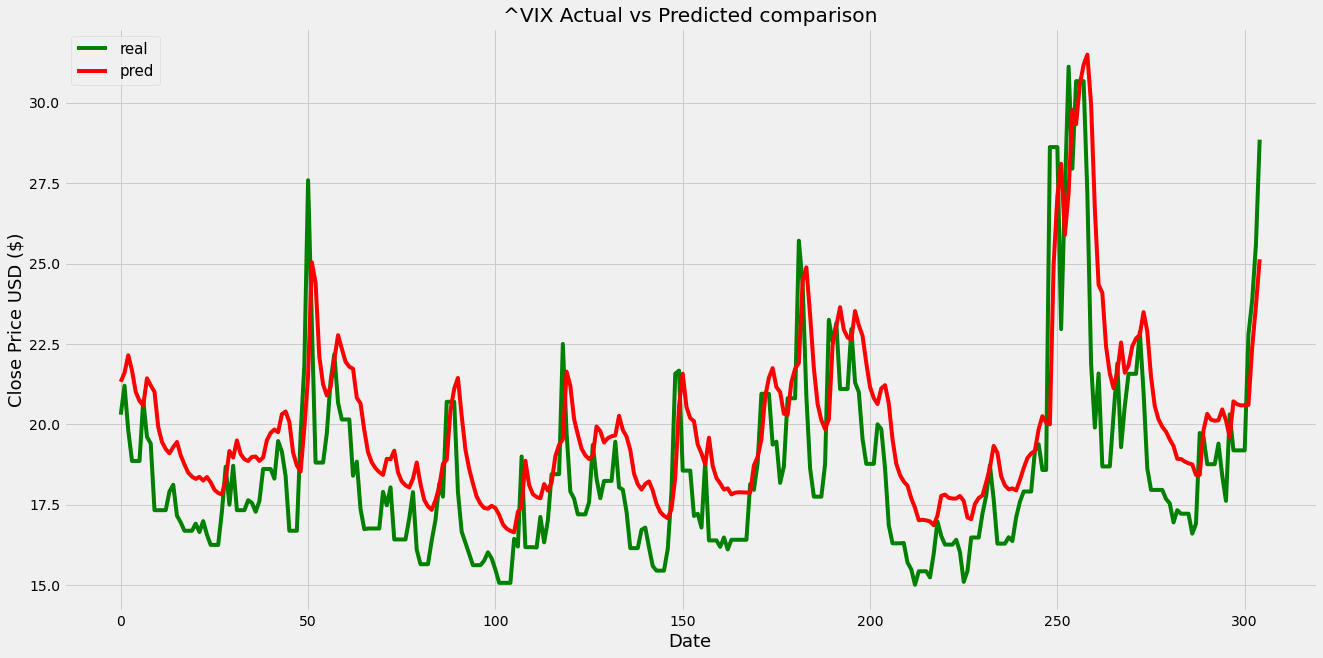

In [189]:
#visualize
plt.figure(figsize=(20,10))


plt.title("{0} Actual vs Predicted comparison".format(stock_symbol))
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(y_test, color= 'green' ,label ="real")
plt.plot(predictions, color= 'red' ,label ="pred")

plt.legend(loc='upper left', fontsize=15)

plt.show()

# ONE DAY FORECAST

In [190]:
last_60_days = alldata[-60:].values

In [191]:
last_60_days.shape

(60, 1)

In [192]:
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

In [193]:
#create an empty list
X_testscaled = []

In [194]:
#append the past 60 days
X_testscaled.append(last_60_days_scaled)

#convert the X_test data set to a numpy array
X_testscaled = np.array(X_testscaled)

#reshape the data
X_testscaled = np.reshape(X_testscaled,(X_testscaled.shape[0], X_testscaled.shape[1],1))


In [195]:
X_testscaled.shape

(1, 60, 1)

In [196]:
forecasted_pricescaled = model.predict (X_testscaled)
forecasted_pricescaled

array([[0.24882859]], dtype=float32)

In [197]:
#undo the scaling & predict for 08th March 2021
forecasted_price = scaler.inverse_transform(forecasted_pricescaled)
print(forecasted_price)

[[27.441345]]


# PLOTTING ONE DAY FORECAST

In [198]:
forecasted_price=pd.DataFrame(forecasted_price)
date = pd.DataFrame()
date['Date'] = pd.date_range('01/22/2022', periods = 1, freq ='d')
forecast = pd.concat([date,forecasted_price],axis=1)
forecast.set_index(forecast["Date"], inplace=True)
forecast=forecast.drop(['Date'], axis=1)
forecast.columns=['Forecasted_Close']
forecast

,Forecasted_Close
Date,
2022-01-22,27.441345


<function matplotlib.pyplot.show(close=None, block=None)>

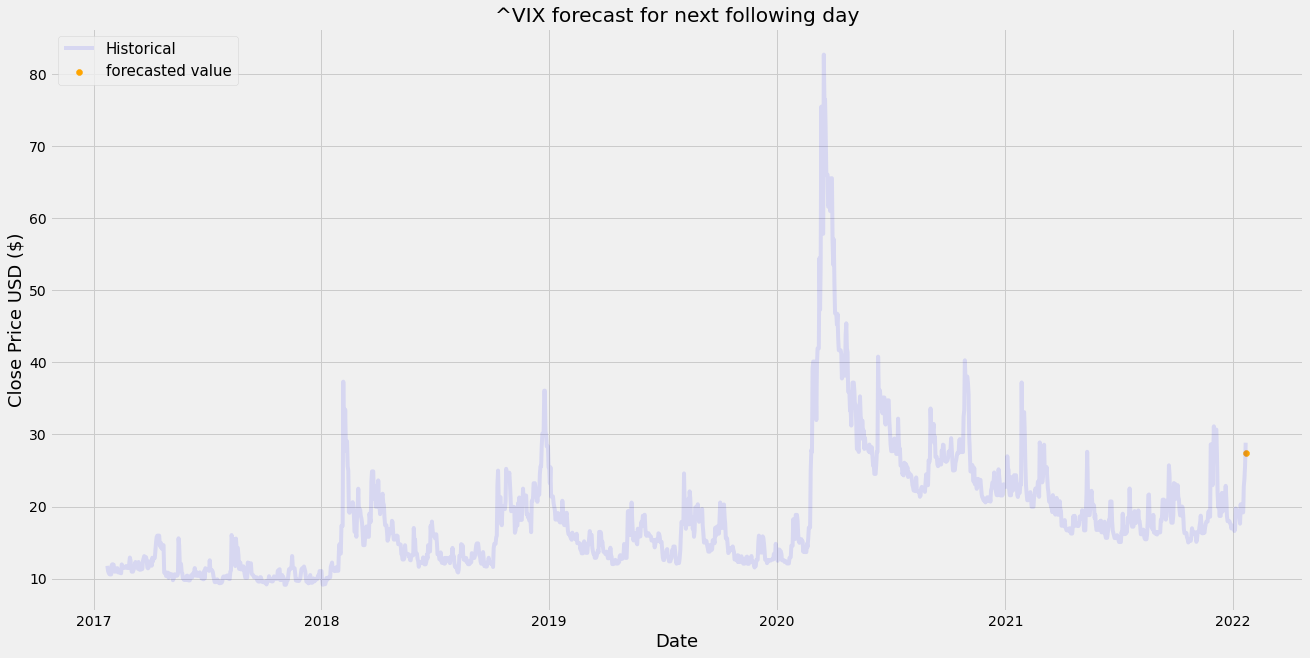

In [199]:
plt.figure(figsize=(20,10))

plt.title("{0} forecast for next following day".format(stock_symbol))
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(alldata['Close'],color='blue', alpha=0.1, label='Historical')
plt.scatter(date,forecast['Forecasted_Close'],color='orange', alpha=1, label='forecasted value')

plt.legend(loc='upper left', fontsize=15)

plt.show

In [200]:
pdatatesting = pdata_testing
pdatatesting

,Date,Actual_Close
0,2021-01-22,21.910000
1,2021-01-23,21.910000
2,2021-01-24,21.910000
3,2021-01-25,23.190001
4,2021-01-26,23.020000
...,...,...
360,2022-01-17,19.190001
361,2022-01-18,22.790001
362,2022-01-19,23.850000
363,2022-01-20,25.590000


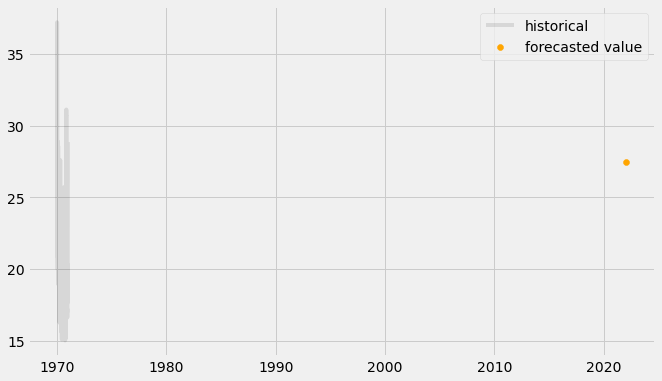

In [201]:
#pdatatesting.set_index(pdatatesting["Date"], inplace=True)
#pdatatesting=pdata_testing.drop(['Date'], axis=1)

plt.plot(pdatatesting['Actual_Close'],color='black', alpha=0.1, label='historical')

plt.scatter(date,forecast['Forecasted_Close'],color='orange', alpha=1, label='forecasted value')

                      
plt.legend()

# 30 DAYS FORECAST

In [202]:
data_testingscaled

array([[0.17362337],
       [0.17362337],
       [0.17362337],
       [0.19102651],
       [0.18871516],
       [0.38164511],
       [0.28647176],
       [0.32562881],
       [0.32562881],
       [0.32562881],
       [0.28687966],
       [0.22324947],
       [0.18721957],
       [0.17171992],
       [0.15948335],
       [0.15948335],
       [0.15948335],
       [0.16451392],
       [0.16981643],
       [0.17471107],
       [0.16464989],
       [0.14724675],
       [0.14724675],
       [0.14724675],
       [0.14724675],
       [0.16750508],
       [0.16804894],
       [0.18150916],
       [0.17552683],
       [0.17552683],
       [0.17552683],
       [0.19456152],
       [0.18993882],
       [0.16587355],
       [0.26852479],
       [0.25574439],
       [0.25574439],
       [0.25574439],
       [0.1932019 ],
       [0.20339904],
       [0.23834125],
       [0.26417401],
       [0.2110129 ],
       [0.2110129 ],
       [0.2110129 ],
       [0.22202581],
       [0.20244731],
       [0.182

In [203]:
len(data_testingscaled)

365

In [204]:
x_input=data_testingscaled[265:].reshape(1,-1)
x_input.shape

(1, 100)

In [205]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [206]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.24882865]
101
1 day input [0.09734872 0.09734872 0.09734872 0.09748469 0.08919102 0.08633582
 0.07980965 0.08552005 0.08552005 0.08552005 0.08293677 0.09299795
 0.10659414 0.10047587 0.09680489 0.09680489 0.09680489 0.09884431
 0.09367777 0.08103331 0.085656   0.09979604 0.09979604 0.09979604
 0.10985722 0.11747111 0.13038748 0.11583955 0.09721279 0.09721279
 0.09721279 0.09993201 0.09830048 0.10836166 0.11488783 0.1192386
 0.1192386  0.1192386  0.13636981 0.139225   0.12834805 0.12834805
 0.26485384 0.26485384 0.26485384 0.18789937 0.24541128 0.29884432
 0.25574439 0.29272602 0.29272602 0.29272602 0.24527532 0.17335144
 0.14629502 0.16913663 0.12984364 0.12984364 0.12984364 0.15186946
 0.17335144 0.13800136 0.15540447 0.16900067 0.16900067 0.16900067
 0.18667573 0.16138681 0.12902785 0.1199184  0.1199184  0.1199184
 0.1199184  0.11611148 0.11420803 0.10618627 0.11135281 0.10985722
 0.10985722 0.10985722 0.1014276  0.10564241 0.14398367 0.14235214
 0.13079537 0.13079537 0.13079537 0

 0.27543741 0.28349534 0.29165509 0.2998575 ]
8 day output [[0.30807325]]
9 day input [0.08552005 0.08552005 0.08293677 0.09299795 0.10659414 0.10047587
 0.09680489 0.09680489 0.09680489 0.09884431 0.09367777 0.08103331
 0.085656   0.09979604 0.09979604 0.09979604 0.10985722 0.11747111
 0.13038748 0.11583955 0.09721279 0.09721279 0.09721279 0.09993201
 0.09830048 0.10836166 0.11488783 0.1192386  0.1192386  0.1192386
 0.13636981 0.139225   0.12834805 0.12834805 0.26485384 0.26485384
 0.26485384 0.18789937 0.24541128 0.29884432 0.25574439 0.29272602
 0.29272602 0.29272602 0.24527532 0.17335144 0.14629502 0.16913663
 0.12984364 0.12984364 0.12984364 0.15186946 0.17335144 0.13800136
 0.15540447 0.16900067 0.16900067 0.16900067 0.18667573 0.16138681
 0.12902785 0.1199184  0.1199184  0.1199184  0.1199184  0.11611148
 0.11420803 0.10618627 0.11135281 0.10985722 0.10985722 0.10985722
 0.1014276  0.10564241 0.14398367 0.14235214 0.13079537 0.13079537
 0.13079537 0.13949693 0.1260367  0.11529572

18 day input [0.09884431 0.09367777 0.08103331 0.085656   0.09979604 0.09979604
 0.09979604 0.10985722 0.11747111 0.13038748 0.11583955 0.09721279
 0.09721279 0.09721279 0.09993201 0.09830048 0.10836166 0.11488783
 0.1192386  0.1192386  0.1192386  0.13636981 0.139225   0.12834805
 0.12834805 0.26485384 0.26485384 0.26485384 0.18789937 0.24541128
 0.29884432 0.25574439 0.29272602 0.29272602 0.29272602 0.24527532
 0.17335144 0.14629502 0.16913663 0.12984364 0.12984364 0.12984364
 0.15186946 0.17335144 0.13800136 0.15540447 0.16900067 0.16900067
 0.16900067 0.18667573 0.16138681 0.12902785 0.1199184  0.1199184
 0.1199184  0.1199184  0.11611148 0.11420803 0.10618627 0.11135281
 0.10985722 0.10985722 0.10985722 0.1014276  0.10564241 0.14398367
 0.14235214 0.13079537 0.13079537 0.13079537 0.13949693 0.1260367
 0.11529572 0.15186946 0.13664174 0.13664174 0.13664174 0.13664174
 0.18558804 0.19999999 0.22365737 0.26798096 0.24882865 0.25397655
 0.26026979 0.26760677 0.27543741 0.28349534 0.2916

27 day output [[0.45684832]]
28 day input [0.11583955 0.09721279 0.09721279 0.09721279 0.09993201 0.09830048
 0.10836166 0.11488783 0.1192386  0.1192386  0.1192386  0.13636981
 0.139225   0.12834805 0.12834805 0.26485384 0.26485384 0.26485384
 0.18789937 0.24541128 0.29884432 0.25574439 0.29272602 0.29272602
 0.29272602 0.24527532 0.17335144 0.14629502 0.16913663 0.12984364
 0.12984364 0.12984364 0.15186946 0.17335144 0.13800136 0.15540447
 0.16900067 0.16900067 0.16900067 0.18667573 0.16138681 0.12902785
 0.1199184  0.1199184  0.1199184  0.1199184  0.11611148 0.11420803
 0.10618627 0.11135281 0.10985722 0.10985722 0.10985722 0.1014276
 0.10564241 0.14398367 0.14235214 0.13079537 0.13079537 0.13079537
 0.13949693 0.1260367  0.11529572 0.15186946 0.13664174 0.13664174
 0.13664174 0.13664174 0.18558804 0.19999999 0.22365737 0.26798096
 0.24882865 0.25397655 0.26026979 0.26760677 0.27543741 0.28349534
 0.29165509 0.2998575  0.30807325 0.31628621 0.32448667 0.33266804
 0.34082422 0.3489505

In [207]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [208]:
alldata

,Close
2017-01-23,11.770000
2017-01-24,11.070000
2017-01-25,10.810000
2017-01-26,10.630000
2017-01-27,10.580000
...,...
2022-01-17,19.190001
2022-01-18,22.790001
2022-01-19,23.850000
2022-01-20,25.590000


In [209]:
alldatareset=alldata.reset_index()['Close']

In [210]:
alldatareset

0       11.770000
1       11.070000
2       10.810000
3       10.630000
4       10.580000
          ...    
1820    19.190001
1821    22.790001
1822    23.850000
1823    25.590000
1824    28.850000
Name: Close, Length: 1825, dtype: float64

In [211]:
alldataresetscaled=scaler.fit_transform(np.array(alldatareset).reshape(-1,1))

In [212]:
alldataresetscaled

array([[0.03575799],
       [0.02624064],
       [0.02270564],
       ...,
       [0.19999999],
       [0.22365737],
       [0.26798096]])

In [213]:
len(alldataresetscaled)

1825

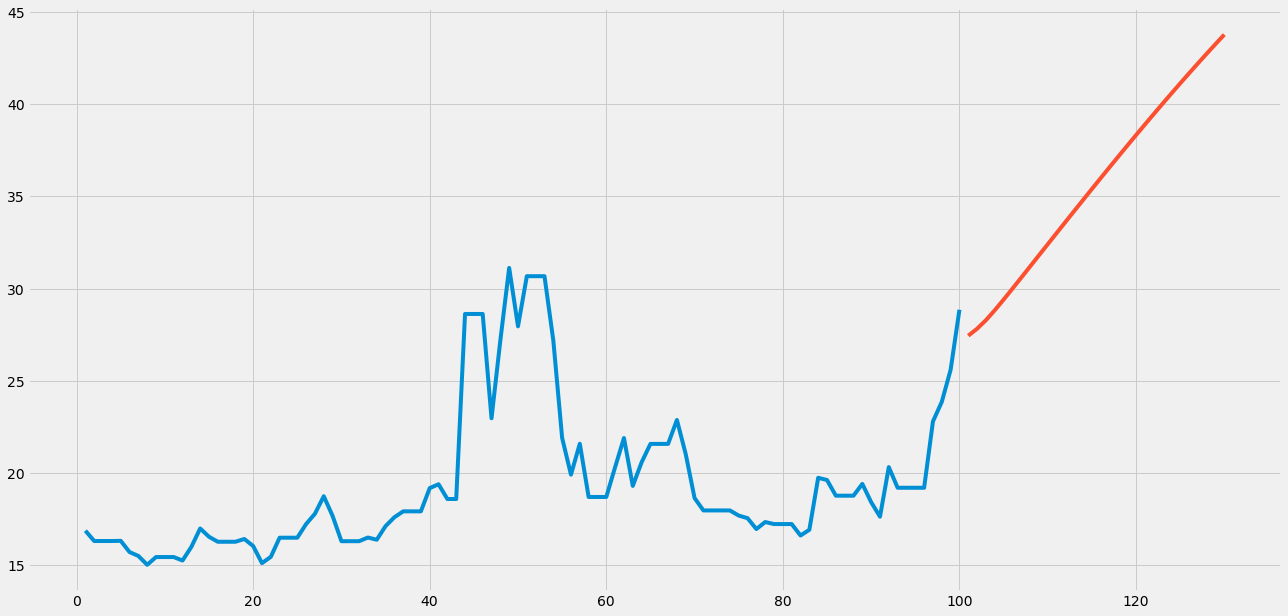

In [214]:
plt.figure(figsize=(20,10))
plt.plot(day_new,scaler.inverse_transform(alldataresetscaled[1725:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

# MANIPULATING DATA FOR PLOTTING

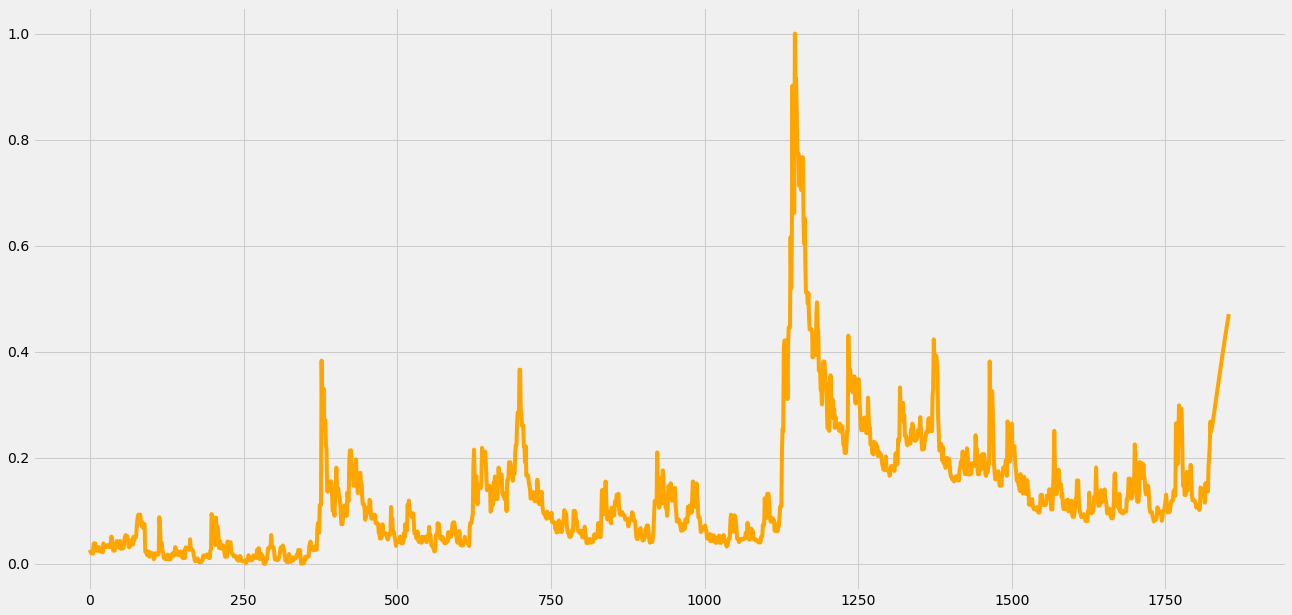

In [215]:
plt.figure(figsize=(20,10))
tempdata=alldataresetscaled.tolist()
tempdata.extend(lst_output)
plt.plot(tempdata[1:],color='orange')

In [216]:
tempdata1=scaler.inverse_transform(tempdata)

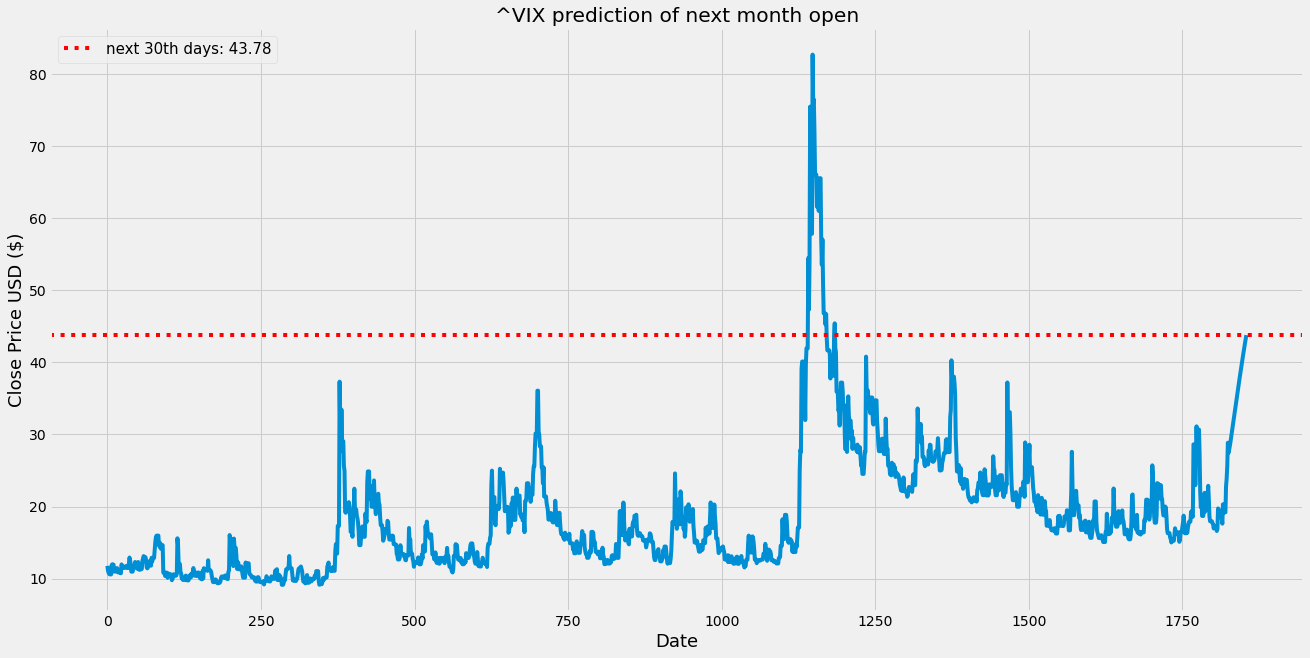

In [217]:
#Plotting final results with predicted value after 30 Days
plt.figure(figsize=(20,10))
plt.plot(tempdata1)
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=tempdata1[len(tempdata1)-1], color = 'red', linestyle = ':', label = 'next 30th days: {0}'.format(round(float(*tempdata1[len(tempdata1)-1]),2)))
plt.legend(loc='upper left', fontsize=15)

In [218]:
import numpy as np

lst = tempdata1

float_lst = list(np.float_(lst))
    
print(float_lst)

[array([11.77000046]), array([11.06999969]), array([10.81000042]), array([10.63000011]), array([10.57999992]), array([10.57999992]), array([10.57999992]), array([11.88000011]), array([11.98999977]), array([11.81000042]), array([11.93000031]), array([10.97000027]), array([10.97000027]), array([10.97000027]), array([11.36999989]), array([11.28999996]), array([11.44999981]), array([10.88000011]), array([10.85000038]), array([10.85000038]), array([10.85000038]), array([11.06999969]), array([10.73999977]), array([11.97000027]), array([11.76000023]), array([11.48999977]), array([11.48999977]), array([11.48999977]), array([11.48999977]), array([11.56999969]), array([11.73999977]), array([11.71000004]), array([11.47000027]), array([11.47000027]), array([11.47000027]), array([12.09000015]), array([12.92000008]), array([12.53999996]), array([11.81000042]), array([10.96000004]), array([10.96000004]), array([10.96000004]), array([11.23999977]), array([11.44999981]), array([11.85999966]), array([12

In [219]:
tempdata2=float_lst

In [220]:
tempdata3 = np.array(tempdata2)
tempdata3

array([[11.77000046],
       [11.06999969],
       [10.81000042],
       ...,
       [42.74119548],
       [43.26390143],
       [43.77922267]])

In [221]:
tempdata4 = pd.DataFrame(tempdata3)
tempdata4.tail(31)

,0
1824,28.850000
1825,27.441348
1826,27.819976
1827,28.282844
1828,28.822478
1829,29.398423
1830,29.991083
1831,30.591233
1832,31.194520
1833,31.798789


In [222]:
newdate = pd.DataFrame()
newdate['Date'] = pd.date_range('23/01/2017', periods = 1855, freq ='d')
#1290= len data (1260) + prediction days (30)
newdate.tail(31)

,Date
1824,2022-01-21
1825,2022-01-22
1826,2022-01-23
1827,2022-01-24
1828,2022-01-25
1829,2022-01-26
1830,2022-01-27
1831,2022-01-28
1832,2022-01-29
1833,2022-01-30


In [223]:
tempdata5 = pd.concat([newdate,tempdata4],axis=1)

In [224]:
#Clean the dataset and rename columns for visual representations
tempdata5.set_index(tempdata5["Date"], inplace=True)

In [225]:
tempdata5.tail(31)

,Date,0
Date,,
2022-01-21,2022-01-21,28.850000
2022-01-22,2022-01-22,27.441348
2022-01-23,2022-01-23,27.819976
2022-01-24,2022-01-24,28.282844
2022-01-25,2022-01-25,28.822478
2022-01-26,2022-01-26,29.398423
2022-01-27,2022-01-27,29.991083
2022-01-28,2022-01-28,30.591233
2022-01-29,2022-01-29,31.194520


In [226]:
tempdata6=tempdata5.drop(['Date'], axis=1)
tempdata6.columns=['Forecasted_Close']


In [227]:
tempdata6.tail(31)

,Forecasted_Close
Date,
2022-01-21,28.850000
2022-01-22,27.441348
2022-01-23,27.819976
2022-01-24,28.282844
2022-01-25,28.822478
2022-01-26,29.398423
2022-01-27,29.991083
2022-01-28,30.591233
2022-01-29,31.194520


In [228]:
tempdata7=tempdata6.tail(31)
tempdata7

,Forecasted_Close
Date,
2022-01-21,28.850000
2022-01-22,27.441348
2022-01-23,27.819976
2022-01-24,28.282844
2022-01-25,28.822478
2022-01-26,29.398423
2022-01-27,29.991083
2022-01-28,30.591233
2022-01-29,31.194520


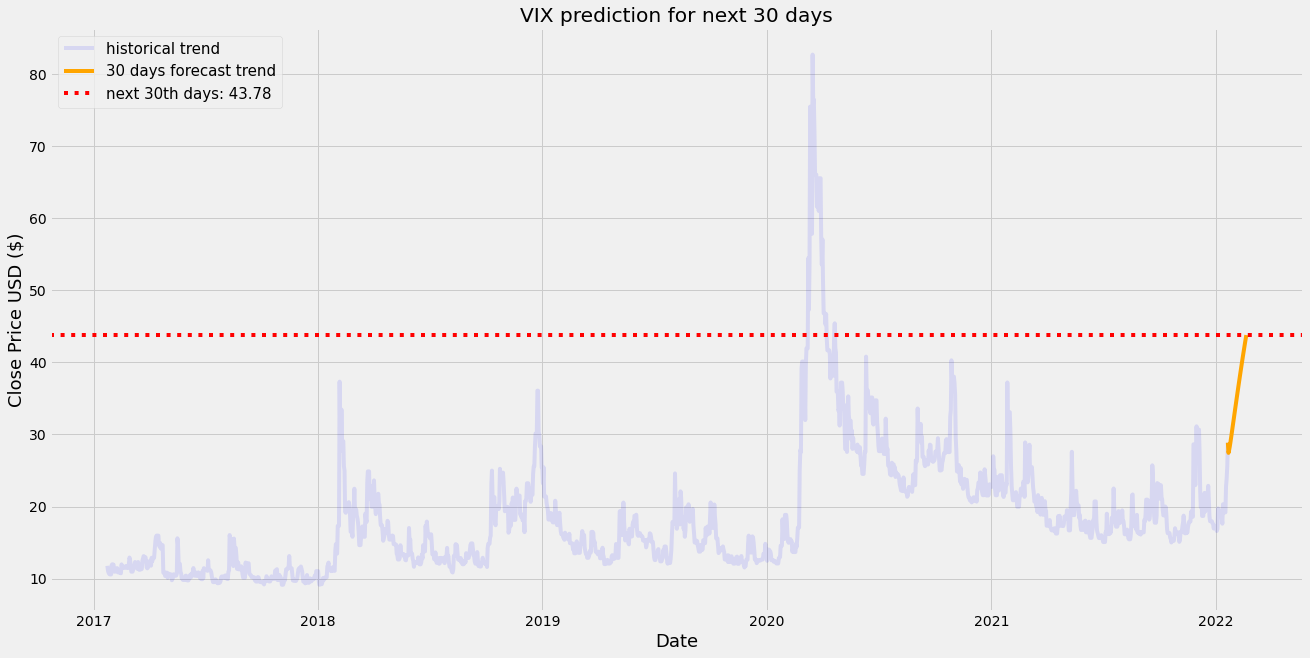

In [229]:
plt.figure(figsize=(20,10))
plt.title("{0} prediction for next 30 days".format(Object_study))

plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(alldata['Close'],color='blue', alpha=0.1, label='historical trend')
plt.plot(tempdata7['Forecasted_Close'],color='orange', alpha=1, label='30 days forecast trend')
plt.axhline(y=tempdata1[len(tempdata1)-1], color = 'red', linestyle = ':', label = 'next 30th days: {0}'.format(round(float(*tempdata1[len(tempdata1)-1]),2)))

plt.legend(loc='upper left', fontsize=15)

In [230]:
tempdata6.tail(1)

,Forecasted_Close
Date,
2022-02-20,43.779223
